In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Load dataset (Update with your file path)
file_path = "/content/drive/MyDrive/Colab Notebooks/Datasets/Superstore - store analysis.xlsx"
df = pd.read_excel(file_path)

# Display dataset info
print("\nDataset Overview:")
print(df.head())

# Convert Order Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])


Dataset Overview:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420

In [12]:

# Basic customer-level aggregation
customer_data = df.groupby("Customer ID").agg(
    Total_Sales=("Sales", "sum"),
    Total_Orders=("Order ID", "nunique"),
    Total_Profit=("Profit", "sum"),
    Total_Quantity=("Quantity", "sum"),
    First_Purchase=("Order Date", "min"),
    Last_Purchase=("Order Date", "max"),
)

# Calculate Average Order Value (AOV)
customer_data["AOV"] = customer_data["Total_Sales"] / customer_data["Total_Orders"]

# Calculate Purchase Frequency (PF)
total_customers = df["Customer ID"].nunique()
total_orders = df["Order ID"].nunique()
purchase_frequency = total_orders / total_customers

# Calculate Customer Retention Rate (CRR)
retention_df = df.groupby("Customer ID").agg(Order_Count=("Order ID", "count"))
repeat_customers = retention_df[retention_df["Order_Count"] > 1].shape[0]
CRR = repeat_customers / total_customers

# Calculate Profit Margin (PM)
customer_data["Profit Margin"] = customer_data["Total_Profit"] / customer_data["Total_Sales"]

# Calculate CLV (using simplified formula)
customer_data["CLV"] = customer_data["AOV"] * purchase_frequency * CRR * customer_data["Profit Margin"]

# Display top CLV customers
print("\n🔹 Top 10 Customers by CLV:")
print(customer_data.sort_values("CLV", ascending=False).head(10))

# CLV Segmentation
customer_data["CLV Category"] = pd.qcut(customer_data["CLV"], 4, labels=["Low", "Medium", "High", "VIP"])


🔹 Top 10 Customers by CLV:
             Total_Sales  Total_Orders  Total_Profit  Total_Quantity  \
Customer ID                                                            
TC-20980       19052.218             5     8981.3239              42   
TA-21385       14595.620             4     4703.7883              36   
RB-19360       15117.339             6     6976.0959              71   
CM-12385        8954.020             4     3899.8904              34   
HL-15040       12873.298             6     5622.4292              50   
MW-18235        5253.876             2     1665.5160              13   
SC-20095       14142.334             9     5757.4119              87   
AB-10105       14473.571            10     5444.8055              73   
BS-11365       10501.653             5     2616.0644              39   
JC-15385        1058.108             1      502.9244              14   

            First_Purchase Last_Purchase          AOV  Profit Margin  \
Customer ID                        

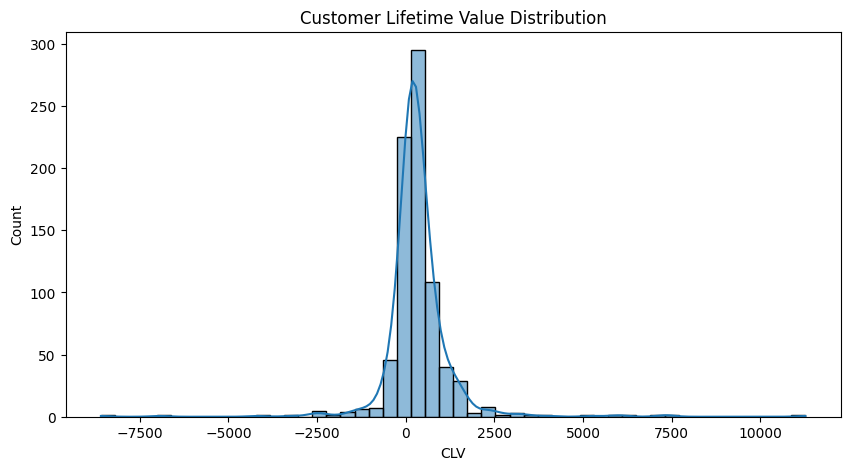

In [13]:

# Plot CLV Distribution
plt.figure(figsize=(10, 5))
sns.histplot(customer_data["CLV"], bins=50, kde=True)
plt.title("Customer Lifetime Value Distribution")
plt.xlabel("CLV")
plt.ylabel("Count")
plt.show()


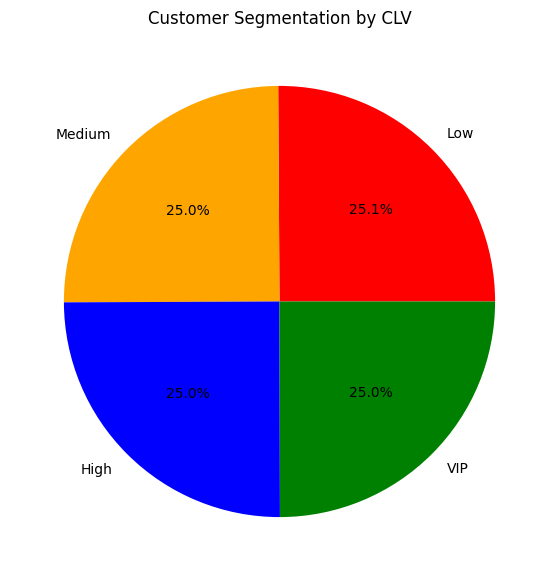

In [14]:

# CLV Segmentation Pie Chart
plt.figure(figsize=(7, 7))
customer_data["CLV Category"].value_counts().plot.pie(autopct="%1.1f%%", colors=["red", "orange", "blue", "green"])
plt.title("Customer Segmentation by CLV")
plt.ylabel("")
plt.show()